<a href="https://colab.research.google.com/github/psrl9/Projects/blob/main/Forecasting_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet


In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'


## Importing the Dataset & Exploring it

In [ ]:
#read_csv function from pandas
df = pd.read_csv("TCS.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-11-16,245.000000,249.500000,241.787506,245.725006,186.005371,3666816.0
1,2007-11-19,240.024994,251.750000,240.024994,248.375000,188.011337,2943548.0
2,2007-11-20,247.250000,247.250000,239.524994,240.324997,181.917725,4111392.0
3,2007-11-21,240.324997,245.000000,234.000000,236.199997,178.795242,3337028.0
4,2007-11-22,242.425003,242.425003,233.750000,237.550003,179.817184,2402356.0
...,...,...,...,...,...,...,...
3697,2022-11-09,3249.800049,3249.800049,3201.649902,3216.050049,3216.050049,1162267.0
3698,2022-11-10,3170.000000,3225.000000,3170.000000,3205.649902,3205.649902,1573092.0
3699,2022-11-11,3269.600098,3341.600098,3255.050049,3315.949951,3315.949951,3265394.0
3700,2022-11-14,3324.000000,3349.000000,3309.000000,3335.500000,3335.500000,1342074.0


In [ ]:
#Analyse data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3702 entries, 0 to 3701
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3702 non-null   object 
 1   Open       3695 non-null   float64
 2   High       3695 non-null   float64
 3   Low        3695 non-null   float64
 4   Close      3695 non-null   float64
 5   Adj Close  3695 non-null   float64
 6   Volume     3695 non-null   float64
dtypes: float64(6), object(1)
memory usage: 202.6+ KB


In [ ]:
#Statistical analysis
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3.695000e+03
mean,1355.168866,1369.608202,1339.658508,1354.511610,1250.228956,3.243431e+06
std,993.012333,1001.581786,983.151776,992.189399,1001.041788,2.753956e+06
min,112.000000,116.112503,103.837502,111.550003,86.565529,0.000000e+00
25%,569.700012,575.925018,561.075012,568.962494,459.186538,1.847140e+06
50%,1204.500000,1215.000000,1193.000000,1203.949951,1062.834106,2.574652e+06
75%,1990.950012,2009.974976,1972.525024,1991.949951,1857.749817,3.820338e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502930,8.806715e+07


# Data Visualization using plotly express- Visualizing the historical performance of Stock


In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df,x = "Date", y="Volume")

In [ ]:
#Statistical data
px.box(df, y="Close")

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-11-16,245.000000,249.500000,241.787506,245.725006,186.005371,3666816.0
1,2007-11-19,240.024994,251.750000,240.024994,248.375000,188.011337,2943548.0
2,2007-11-20,247.250000,247.250000,239.524994,240.324997,181.917725,4111392.0
3,2007-11-21,240.324997,245.000000,234.000000,236.199997,178.795242,3337028.0
4,2007-11-22,242.425003,242.425003,233.750000,237.550003,179.817184,2402356.0
...,...,...,...,...,...,...,...
3697,2022-11-09,3249.800049,3249.800049,3201.649902,3216.050049,3216.050049,1162267.0
3698,2022-11-10,3170.000000,3225.000000,3170.000000,3205.649902,3205.649902,1573092.0
3699,2022-11-11,3269.600098,3341.600098,3255.050049,3315.949951,3315.949951,3265394.0
3700,2022-11-14,3324.000000,3349.000000,3309.000000,3335.500000,3335.500000,1342074.0


In [ ]:
columns = ['Date', 'Close'] 
ndf = pd.DataFrame(df, columns=columns) 

In [ ]:
ndf

,Date,Close
0,2007-11-16,245.725006
1,2007-11-19,248.375000
2,2007-11-20,240.324997
3,2007-11-21,236.199997
4,2007-11-22,237.550003
...,...,...
3697,2022-11-09,3216.050049
3698,2022-11-10,3205.649902
3699,2022-11-11,3315.949951
3700,2022-11-14,3335.500000


In [ ]:
#creating new dataframe
prophet_df = ndf.rename(columns={'Date':'ds', 'Close': 'y'})

In [ ]:
prophet_df

,ds,y
0,2007-11-16,245.725006
1,2007-11-19,248.375000
2,2007-11-20,240.324997
3,2007-11-21,236.199997
4,2007-11-22,237.550003
...,...,...
3697,2022-11-09,3216.050049
3698,2022-11-10,3205.649902
3699,2022-11-11,3315.949951
3700,2022-11-14,3335.500000


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
# Training the model
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw10hirs0/smx0p9og.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw10hirs0/m78kqrcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99134', 'data', 'file=/tmp/tmpw10hirs0/smx0p9og.json', 'init=/tmp/tmpw10hirs0/m78kqrcq.json', 'output', 'file=/tmp/tmpw10hirs0/prophet_modelkamjezoc/prophet_model-20221116111529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
#Forecast for 30 days
future = m.make_future_dataframe(periods = 300)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-11-16,218.943995,-24.492731,422.735447,218.943995,218.943995,-13.628930,-13.628930,-13.628930,-3.229572,-3.229572,-3.229572,-10.399358,-10.399358,-10.399358,0.0,0.0,0.0,205.315064
1,2007-11-19,218.607460,-21.171063,424.054920,218.607460,218.607460,-7.219205,-7.219205,-7.219205,-0.248391,-0.248391,-0.248391,-6.970814,-6.970814,-6.970814,0.0,0.0,0.0,211.388256
2,2007-11-20,218.495282,-2.118309,434.066079,218.495282,218.495282,-4.807727,-4.807727,-4.807727,1.155241,1.155241,1.155241,-5.962968,-5.962968,-5.962968,0.0,0.0,0.0,213.687555
3,2007-11-21,218.383104,3.493309,426.051006,218.383104,218.383104,-4.738586,-4.738586,-4.738586,0.294088,0.294088,0.294088,-5.032674,-5.032674,-5.032674,0.0,0.0,0.0,213.644518
4,2007-11-22,218.270926,-14.582113,431.543680,218.270926,218.270926,-5.369494,-5.369494,-5.369494,-1.186944,-1.186944,-1.186944,-4.182549,-4.182549,-4.182549,0.0,0.0,0.0,212.901432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,2023-09-07,4255.422333,4031.051158,4495.631735,4170.125650,4333.772657,12.052162,12.052162,12.052162,-1.186944,-1.186944,-1.186944,13.239106,13.239106,13.239106,0.0,0.0,0.0,4267.474495
3998,2023-09-08,4256.950447,4044.335952,4505.035210,4171.590362,4336.263436,9.441690,9.441690,9.441690,-3.229572,-3.229572,-3.229572,12.671262,12.671262,12.671262,0.0,0.0,0.0,4266.392137
3999,2023-09-09,4258.478562,4030.069916,4505.686911,4172.830990,4338.858658,8.753371,8.753371,8.753371,-3.370720,-3.370720,-3.370720,12.124091,12.124091,12.124091,0.0,0.0,0.0,4267.231933
4000,2023-09-10,4260.006676,4035.629064,4524.045081,4174.068099,4341.075041,18.194196,18.194196,18.194196,6.586299,6.586299,6.586299,11.607897,11.607897,11.607897,0.0,0.0,0.0,4278.200872


In [ ]:
px.line(forecast, x="ds", y='yhat')

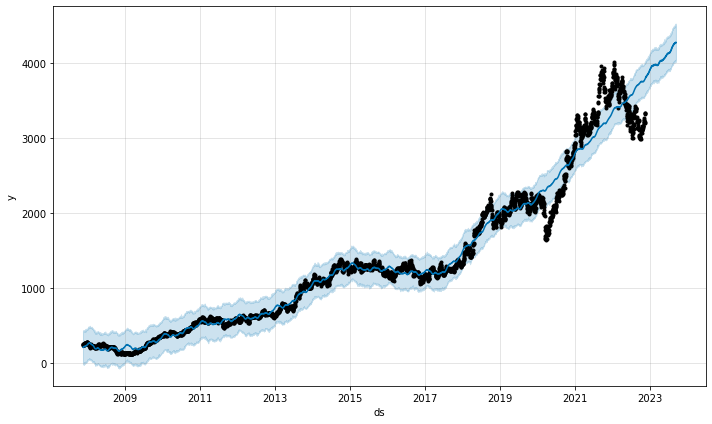

In [ ]:
figure = m.plot(forecast, xlabel = 'ds', ylabel ='y')

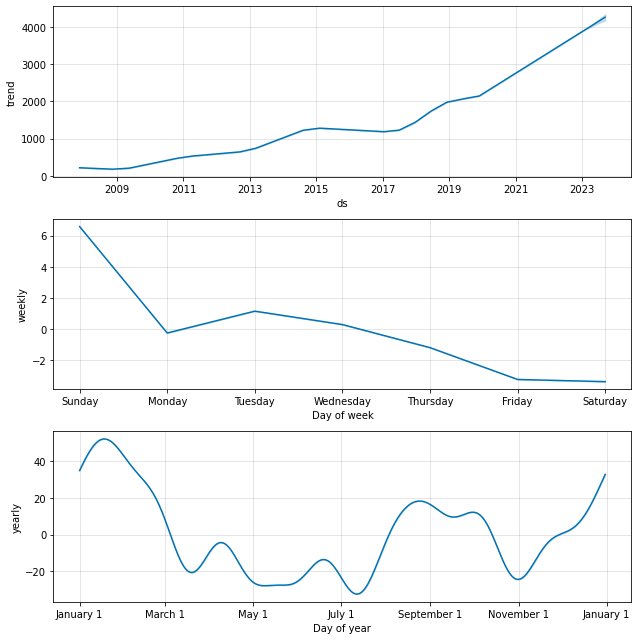

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')   #convert forecast dataframe to csv file
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Thank You**
